In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
#import CSV file
df = pd.read_csv('Resources/Data/winequality-red.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.drop_duplicates(keep= 'first', inplace = False)
df.dropna(axis = 'columns', how='all')
df.reset_index(drop =True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.shape

(1599, 12)

In [6]:
#Features for Quality
bins = [2,6,9]
labels = ['Fair', 'Very Good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels) 
    

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Fair
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Fair
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Fair
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Fair
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Fair


In [8]:
# Assign X (factors) and y (quality)
X = df.drop("quality", axis=1)
y = df["quality"]
print(X.shape, y.shape)

(1599, 11) (1599,)


In [9]:
df['quality'].value_counts()

Fair         1382
Very Good     217
Name: quality, dtype: int64

[0.07703538 0.10300335 0.09528775 0.07304903 0.06921803 0.0676567
 0.07758603 0.0842079  0.06877817 0.11257172 0.17160593]


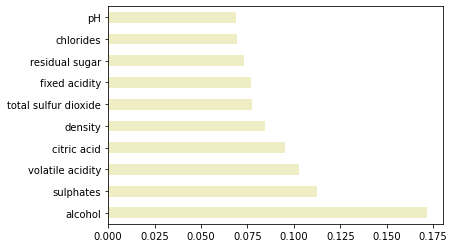

In [10]:
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind= "barh" , color = "#EEEDC4")
plt.show()

In [11]:
feat_importances.sort_values(ascending=False)

alcohol                 0.171606
sulphates               0.112572
volatile acidity        0.103003
citric acid             0.095288
density                 0.084208
total sulfur dioxide    0.077586
fixed acidity           0.077035
residual sugar          0.073049
chlorides               0.069218
pH                      0.068778
free sulfur dioxide     0.067657
dtype: float64

In [12]:
#Top5Features
top5_features= X[['alcohol', 'density', 'residual sugar', 'free sulfur dioxide', 'pH']]

### All Features

In [13]:
x = df[df.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

# Split our data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [14]:
for data in [y_train, y_test]:
    print(data.describe())

count     1279
unique       2
top       Fair
freq      1109
Name: quality, dtype: object
count      320
unique       2
top       Fair
freq       273
Name: quality, dtype: object


In [15]:
#Create a Logistic Regression Model

classifier = LogisticRegression()
classifier

LogisticRegression()

In [16]:
 classifier.fit(x_train, y_train)

LogisticRegression()

In [17]:
print(f"Training Data Score: {classifier.score(x_train, y_train)}")
print(f"Testing Data Score: {classifier.score(x_test, y_test)}")

Training Data Score: 0.8858483189992181
Testing Data Score: 0.865625


In [18]:
predictions = classifier.predict(x_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair']
First 10 Actual labels: ['Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair']


In [19]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Fair,Fair
1,Fair,Fair
2,Fair,Fair
3,Fair,Fair
4,Fair,Fair
...,...,...
315,Fair,Fair
316,Fair,Fair
317,Fair,Fair
318,Fair,Fair


In [20]:
print(classification_report(predictions,y_test ))

              precision    recall  f1-score   support

        Fair       0.97      0.89      0.92       298
   Very Good       0.28      0.59      0.38        22

    accuracy                           0.87       320
   macro avg       0.62      0.74      0.65       320
weighted avg       0.92      0.87      0.89       320



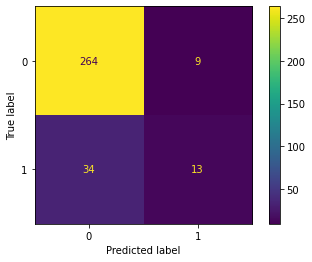

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig('Resources/images/red_all_features_confu_KNN.jpg')

### Top 5 Features

In [22]:
x = df[top5_features.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

# Split our data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [23]:
for data in [y_train, y_test]:
    print(data.describe())

count     1279
unique       2
top       Fair
freq      1109
Name: quality, dtype: object
count      320
unique       2
top       Fair
freq       273
Name: quality, dtype: object


In [24]:
#Create a Logistic Regression Model

classifier = LogisticRegression()
classifier

LogisticRegression()

In [25]:
 classifier.fit(x_train, y_train)

LogisticRegression()

In [26]:
print(f"Training Data Score: {classifier.score(x_train, y_train)}")
print(f"Testing Data Score: {classifier.score(x_test, y_test)}")

Training Data Score: 0.8663017982799062
Testing Data Score: 0.85


In [27]:
predictions = classifier.predict(x_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair']
First 10 Actual labels: ['Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair']


In [28]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Fair,Fair
1,Fair,Fair
2,Fair,Fair
3,Fair,Fair
4,Fair,Fair
...,...,...
315,Fair,Fair
316,Fair,Fair
317,Fair,Fair
318,Fair,Fair


In [29]:
print(classification_report(predictions,y_test ))

              precision    recall  f1-score   support

        Fair       0.97      0.87      0.92       305
   Very Good       0.15      0.47      0.23        15

    accuracy                           0.85       320
   macro avg       0.56      0.67      0.57       320
weighted avg       0.93      0.85      0.88       320



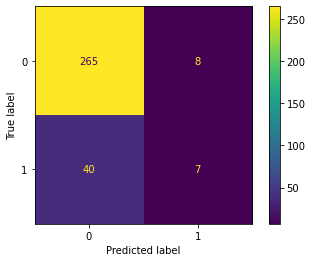

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig('Resources/images/red_top5_features_confu_KNN.jpg')